In [1]:
#import Library
import os
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
#Dataset Load
drive.mount('/content/drive')
# Define the path
dataset_dir = '/content/drive/MyDrive/Project_MRI/MRI'
train_dir = '/content/drive/MyDrive/Project_MRI/MRI/train'
test_dir ='/content/drive/MyDrive/Project_MRI/MRI/train'
valid_dir ='/content/drive/MyDrive/Project_MRI/MRI/valid'

Mounted at /content/drive


Since the image preprocessing for the science dataset is already completed, we can directly load the YOLO model by installing the Ultralytics library

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00


In [4]:
#load model
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolov8n.pt") # Bro i use nano version, you use small and Lerge version for better accuracy, just change version, just its your task

In [6]:
model.train(
    data="/content/drive/MyDrive/Project_MRI/MRI/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0
)

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Project_MRI/MRI/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d1fe090740>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
#Evaluate the Model
model.val()

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 5.5±2.2 MB/s, size: 14.1 KB)
val: Scanning /content/drive/MyDrive/Project_MRI/MRI/valid/labels.cache... 502 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 502/502 399.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 4.0it/s 7.9s
                   all        502        505      0.928      0.905      0.956      0.595
                Glioma        161        163      0.922      0.866      0.951      0.592
            Meningioma        124        125      0.947       0.86      0.951      0.565
              No Tumor         99         99      0.938      0.929      0.962      0.706
             Pituitary        118        118      0.906      0.966      0.959      0.515
Speed: 1.9ms preprocess, 4.1ms 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d22554a840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Now Evaluation

In [11]:
# load best trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# evaluate on validation set
metrics = model.val()

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 7.8±3.5 MB/s, size: 13.5 KB)
val: Scanning /content/drive/MyDrive/Project_MRI/MRI/valid/labels.cache... 502 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 502/502 836.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.6it/s 8.8s
                   all        502        505      0.928      0.905      0.956      0.595
                Glioma        161        163      0.922      0.866      0.951      0.592
            Meningioma        124        125      0.947       0.86      0.951      0.565
              No Tumor         99         99      0.938      0.929      0.962      0.706
             Pituitary        118        118      0.906      0.966      0.959      0.515
Speed: 1.9ms preprocess, 4.0ms 

In [17]:
#model save
# model.export(format="pt")

In [12]:
#Show Overall Results
print(metrics.results_dict)

{'metrics/precision(B)': 0.9283409928285611, 'metrics/recall(B)': 0.9054368227802314, 'metrics/mAP50(B)': 0.9557685225931014, 'metrics/mAP50-95(B)': 0.5945695584134173, 'fitness': 0.5945695584134173}



image 1/1 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0016_jpg.rf.159c29ca54bc1297eedbdfb4a4388bab.jpg: 640x640 1 Glioma, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


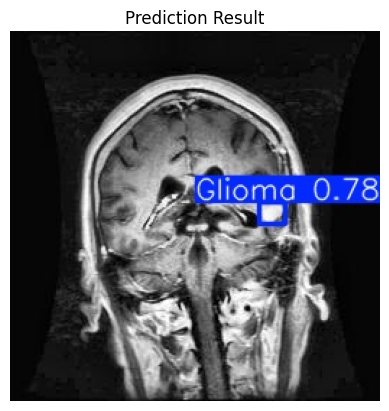

In [13]:
#Predict test on single image for check
results = model.predict("/content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0016_jpg.rf.159c29ca54bc1297eedbdfb4a4388bab.jpg", save=True)

predicted_image_path = results[0].save_dir + '/' + results[0].path.split('/')[-1]

img = cv2.imread(predicted_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title("Prediction Result")
plt.show()

Testing Phase

In [14]:
test_dir = '/content/drive/MyDrive/Project_MRI/MRI/test/images'
results = model.predict(
    source=test_dir,
    conf=0.5,
    save=True,
    project='runs/detect',
    name='predict',
    exist_ok=True
)



image 1/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0016_jpg.rf.159c29ca54bc1297eedbdfb4a4388bab.jpg: 640x640 1 Glioma, 7.4ms
image 2/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0018_jpg.rf.44f43a0c36854a57ff63fba5841b7159.jpg: 640x640 1 Glioma, 7.3ms
image 3/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0028_jpg.rf.3663603795f483cc64002aaed3644f90.jpg: 640x640 1 Glioma, 21.5ms
image 4/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0032_jpg.rf.39513e601368877326708d1e0705a8ee.jpg: 640x640 1 Glioma, 56.2ms
image 5/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0035_jpg.rf.5bba38e1988a9fb30f8a45fd41b3b75b.jpg: 640x640 1 Glioma, 65.2ms
image 6/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0037_jpg.rf.afaef3a8134822f0f3393cfe19559dc5.jpg: 640x640 1 Glioma, 51.3ms
image 7/246 /content/drive/MyDrive/Project_MRI/MRI/test/images/Tr-gl_0040_jpg.rf.adb7d78dc26bf8229ede1d3e65d72e0b.jpg: 640x640 3 Gliomas,

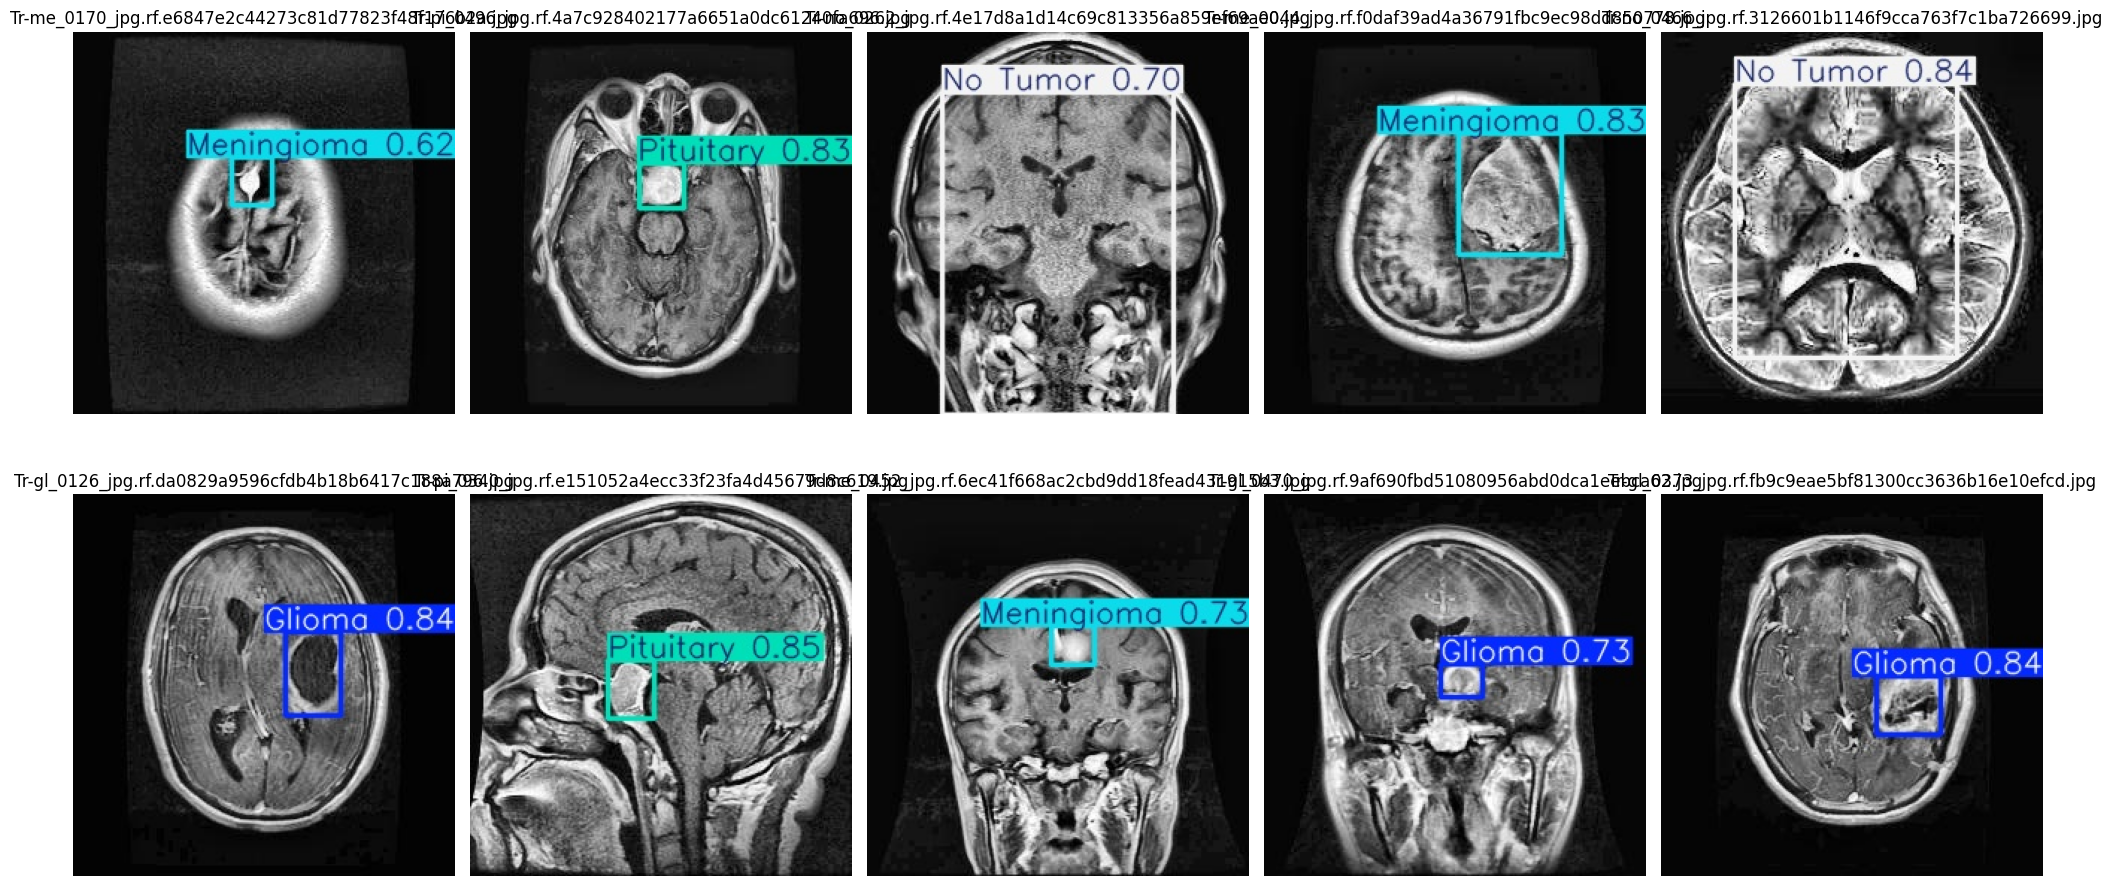

In [15]:
# Fianlly 10 image show after testing
predicted_images_path = '/content/runs/detect/predict'
predicted_images = [os.path.join(predicted_images_path, f) for f in os.listdir(predicted_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))][:10]

# Plot the first 10 predicted images
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, img_path in enumerate(predicted_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p brain_tumor_yolo_project/sample_outputs
!mkdir -p brain_tumor_yolo_project/dataset/train
!mkdir -p brain_tumor_yolo_project/dataset/valid
!mkdir -p brain_tumor_yolo_project/dataset/test

!cp yolov8n.pt brain_tumor_yolo_project/

!cp -r runs/detect/train/* brain_tumor_yolo_project/sample_outputs/


!cp -r /content/drive/MyDrive/Project_MRI/MRI/train/* brain_tumor_yolo_project/dataset/train/
!cp -r /content/drive/MyDrive/Project_MRI/MRI/valid/* brain_tumor_yolo_project/dataset/valid/
!cp -r /content/drive/MyDrive/Project_MRI/MRI/test/* brain_tumor_yolo_project/dataset/test/


!zip -r brain_tumor_yolo_project.zip brain_tumor_yolo_project